In [1]:
# Test 4-1 Dataset 4 v2
# This test uses the new dataset 16000 images
# This test uses a simple CNN to classify between having an circle or parcial circle


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import shutil
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-16 23:33:18.590507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 23:33:18.590575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 23:33:18.591510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 23:33:18.597792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 23:33:19.381216: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_4/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_4/test'

In [4]:
IMG_SIZE = 250
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

335


In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )

Found 10000 files belonging to 2 classes.


2024-04-16 23:33:20.434685: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 23:33:20.434901: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 23:33:20.435022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


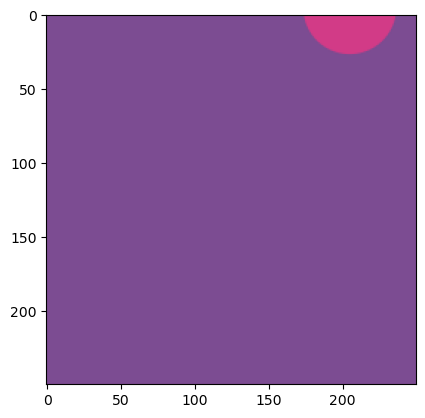

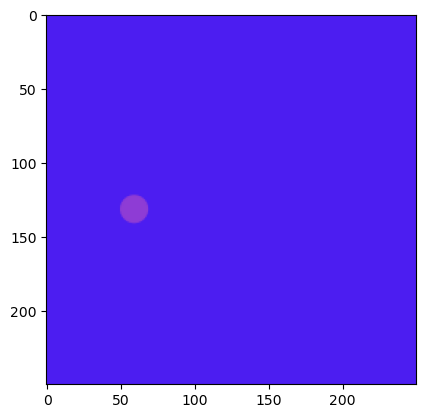

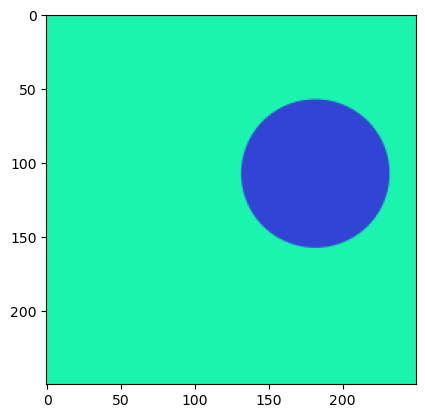

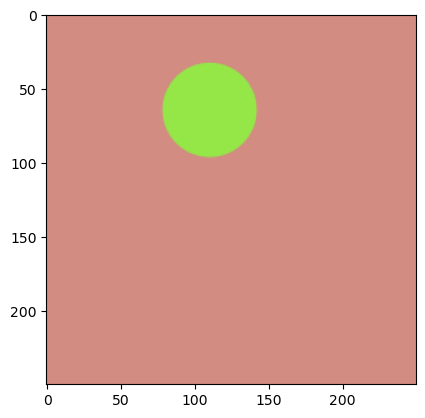

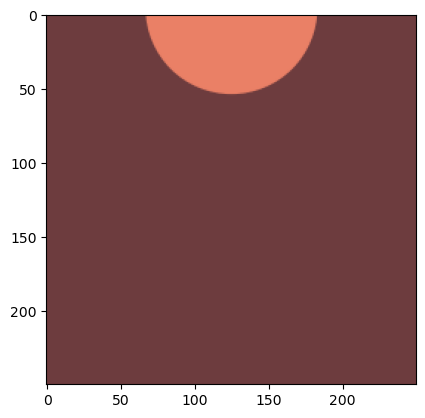

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                        

In [9]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [10]:
checkpoint_filepath = 'models/4-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)



In [11]:
# Best Epoch = ?
history = model.fit(train_dataset, epochs=30, batch_size=16, validation_data=test_dataset, callbacks=[callbacks,early_stop])

Epoch 1/30


2024-04-16 23:33:24.512005: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-16 23:33:24.597312: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-16 23:33:25.637359: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ff078361560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-16 23:33:25.637392: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-16 23:33:25.642441: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713306805.682187  274233 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 [==============================] - ETA: 0s - loss: 0.6118 - acc: 0.6630
Epoch 1: val_loss improved from inf to 0.45046, saving model to models/4-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-001.ckpt/assets


313/313 [==============================] - 26s 67ms/step - loss: 0.6118 - acc: 0.6630 - val_loss: 0.4505 - val_acc: 0.8424
Epoch 2/30
313/313 [==============================] - ETA: 0s - loss: 0.4052 - acc: 0.8412
Epoch 2: val_loss improved from 0.45046 to 0.35875, saving model to models/4-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-002.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.4052 - acc: 0.8412 - val_loss: 0.3587 - val_acc: 0.8580
Epoch 3/30
312/313 [============================>.] - ETA: 0s - loss: 0.3352 - acc: 0.8694
Epoch 3: val_loss improved from 0.35875 to 0.33737, saving model to models/4-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-003.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.3348 - acc: 0.8696 - val_loss: 0.3374 - val_acc: 0.8630
Epoch 4/30
312/313 [============================>.] - ETA: 0s - loss: 0.3003 - acc: 0.8828
Epoch 4: val_loss improved from 0.33737 to 0.28900, saving model to models/4-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-004.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.3006 - acc: 0.8826 - val_loss: 0.2890 - val_acc: 0.8956
Epoch 5/30
312/313 [============================>.] - ETA: 0s - loss: 0.2714 - acc: 0.8934
Epoch 5: val_loss did not improve from 0.28900
313/313 [==============================] - 19s 59ms/step - loss: 0.2716 - acc: 0.8933 - val_loss: 0.2906 - val_acc: 0.8846
Epoch 6/30
313/313 [==============================] - ETA: 0s - loss: 0.2433 - acc: 0.9077
Epoch 6: val_loss improved from 0.28900 to 0.24308, saving model to models/4-1/ch-006.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-006.ckpt/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.2433 - acc: 0.9077 - val_loss: 0.2431 - val_acc: 0.9134
Epoch 7/30
313/313 [==============================] - ETA: 0s - loss: 0.2144 - acc: 0.9190
Epoch 7: val_loss did not improve from 0.24308
313/313 [==============================] - 18s 58ms/step - loss: 0.2144 - acc: 0.9190 - val_loss: 0.2496 - val_acc: 0.9032
Epoch 8/30
312/313 [============================>.] - ETA: 0s - loss: 0.1893 - acc: 0.9317
Epoch 8: val_loss did not improve from 0.24308
313/313 [==============================] - 18s 58ms/step - loss: 0.1897 - acc: 0.9316 - val_loss: 1.2857 - val_acc: 0.7276
Epoch 9/30
313/313 [==============================] - ETA: 0s - loss: 0.1732 - acc: 0.9398
Epoch 9: val_loss improved from 0.24308 to 0.20807, saving model to models/4-1/ch-009.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-009.ckpt/assets


313/313 [==============================] - 19s 60ms/step - loss: 0.1732 - acc: 0.9398 - val_loss: 0.2081 - val_acc: 0.9336
Epoch 10/30
313/313 [==============================] - ETA: 0s - loss: 0.1514 - acc: 0.9485
Epoch 10: val_loss improved from 0.20807 to 0.19641, saving model to models/4-1/ch-010.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-010.ckpt/assets


313/313 [==============================] - 20s 63ms/step - loss: 0.1514 - acc: 0.9485 - val_loss: 0.1964 - val_acc: 0.9450
Epoch 11/30
312/313 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9524
Epoch 11: val_loss did not improve from 0.19641
313/313 [==============================] - 19s 60ms/step - loss: 0.1368 - acc: 0.9523 - val_loss: 0.2044 - val_acc: 0.9396
Epoch 12/30
313/313 [==============================] - ETA: 0s - loss: 0.1232 - acc: 0.9590
Epoch 12: val_loss improved from 0.19641 to 0.18925, saving model to models/4-1/ch-012.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-012.ckpt/assets


313/313 [==============================] - 20s 65ms/step - loss: 0.1232 - acc: 0.9590 - val_loss: 0.1893 - val_acc: 0.9346
Epoch 13/30
312/313 [============================>.] - ETA: 0s - loss: 0.1101 - acc: 0.9632
Epoch 13: val_loss did not improve from 0.18925
313/313 [==============================] - 20s 63ms/step - loss: 0.1100 - acc: 0.9633 - val_loss: 0.2178 - val_acc: 0.9406
Epoch 14/30
312/313 [============================>.] - ETA: 0s - loss: 0.0990 - acc: 0.9678
Epoch 14: val_loss improved from 0.18925 to 0.16117, saving model to models/4-1/ch-014.ckpt
INFO:tensorflow:Assets written to: models/4-1/ch-014.ckpt/assets


INFO:tensorflow:Assets written to: models/4-1/ch-014.ckpt/assets


313/313 [==============================] - 21s 65ms/step - loss: 0.0990 - acc: 0.9678 - val_loss: 0.1612 - val_acc: 0.9558
Epoch 15/30
312/313 [============================>.] - ETA: 0s - loss: 0.0925 - acc: 0.9707
Epoch 15: val_loss did not improve from 0.16117
313/313 [==============================] - 20s 62ms/step - loss: 0.0925 - acc: 0.9707 - val_loss: 0.1700 - val_acc: 0.9486
Epoch 16/30
313/313 [==============================] - ETA: 0s - loss: 0.0822 - acc: 0.9748
Epoch 16: val_loss did not improve from 0.16117
313/313 [==============================] - 20s 62ms/step - loss: 0.0822 - acc: 0.9748 - val_loss: 0.1696 - val_acc: 0.9530
Epoch 17/30
313/313 [==============================] - ETA: 0s - loss: 0.0720 - acc: 0.9751
Epoch 17: val_loss did not improve from 0.16117
313/313 [==============================] - 20s 64ms/step - loss: 0.0720 - acc: 0.9751 - val_loss: 0.1840 - val_acc: 0.9548
Epoch 18/30
313/313 [==============================] - ETA: 0s - loss: 0.0651 - acc: 0.9

In [12]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

157/157 [==============================] - 4s 23ms/step - loss: 0.2349 - acc: 0.9530
0.23492148518562317 0.953000009059906


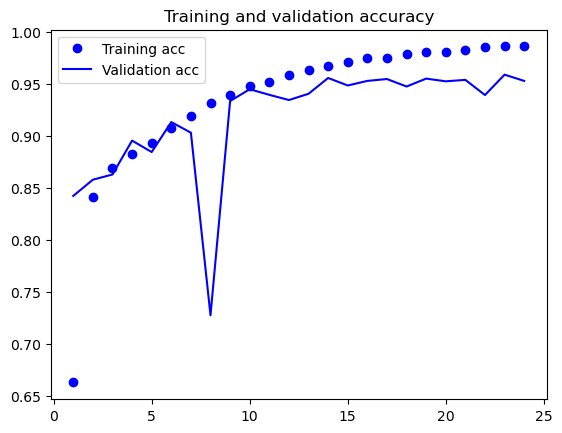

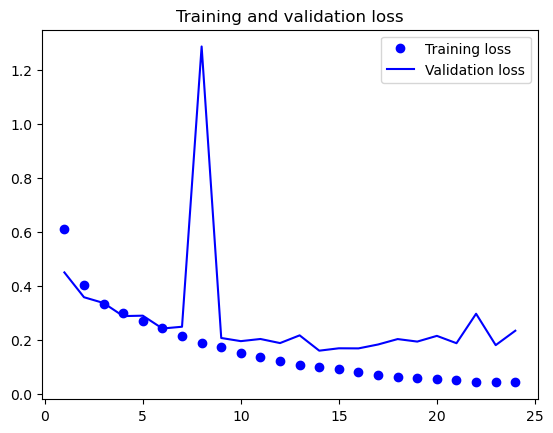

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/4-1/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/4-1/train_test_acc",dpi=100)
plt.show()

In [14]:
import csv
with open('results/4-1/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 61ms/step


In [17]:
with open('results/1-1/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['235', '0', '1']
['610', '0', '1']
['800', '0', '1']
['1062', '0', '1']
['1291', '0', '1']
['1317', '0', '1']
['1843', '0', '1']
['2148', '0', '1']
['2697', '0', '1']
['2705', '0', '1']
['3236', '0', '1']
['3789', '0', '1']
['3809', '0', '1']
['4365', '0', '1']
['4395', '0', '1']
['4935', '0', '1']


In [15]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step
5000
0
235


In [16]:
# write the wrong filenames to a file
with open('results/4-1/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [17]:
output_folder = 'results/4-1/failed_images'
file_name = 'results/4-1/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

    with open(file_name, 'r') as file:
        lines = file.readlines()

    for line in lines:
        line = line.strip()
        if os.path.exists(line):
            filename = os.path.basename(line)
            shutil.copy(line, os.path.join(output_folder, filename))
        else:
            print(f"Image path '{line}' does not exist.")

In [25]:
failed_images_dataset = image_dataset_from_directory(
    'results/4-1/failed_images',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

val_loss, val_acc = model.evaluate(failed_images_dataset, batch_size=32)
print(val_loss, val_acc)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory results/4-1/failed_images. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [31]:
img = tf.keras.preprocessing.image.load_img('../../Dataset_Scripts/Datasets/Dataset_4/test/circles_cut/circle_cut_5003.png', target_size=(IMG_SIZE, IMG_SIZE))

In [32]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 500, 500, 3)
1/1 [==============================] - 0s 16ms/step
Result:  [[0.]]


In [19]:
import csv
import os

output_csv = 'results/4-1/failed_circles.csv'
failed_filenames_txt = 'results/4-1/failed_filenames.txt'
source_file = '../../Dataset_Scripts/Datasets/Dataset_4/data/circles.csv'

# Extract short filenames from failed_filenames.txt
failed_filenames = set()
with open(failed_filenames_txt, 'r') as f1:
    for line in f1:
        filename = os.path.basename(line.strip())  # Get short filename
        failed_filenames.add(filename)

# Open output CSV file for writing
out = open(output_csv, 'w', newline='')
out_writer = csv.writer(out)

# Iterate over rows in squares.csv
with open(source_file, 'r') as f:
    reader = csv.DictReader(f)
    # Write header to output CSV
    out_writer.writerow(reader.fieldnames)
    # Iterate over rows
    for row in reader:
        # Extract filename from the current row
        filename = os.path.basename(row['Filename'])
        # Check if filename is in the set of failed filenames
        if filename in failed_filenames:
            # Write the row to the output CSV
            out_writer.writerow(row.values())

# Close output CSV file
out.close()